# Employee Salary Prediction

    - Objective is to find employee salary based on years of experience
    - Make use of Simple Linear Regression
    - AWS Linear Learner Algorithm will be used for the same

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
salary_df.head(7) # first 7 entries

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150


In [5]:
salary_df.tail(7) # last 7 entries

,YearsExperience,Salary
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [6]:
salary_df['Salary'].max() # max salary

139465

#  Perform Data analysis and visualization

<Axes: >

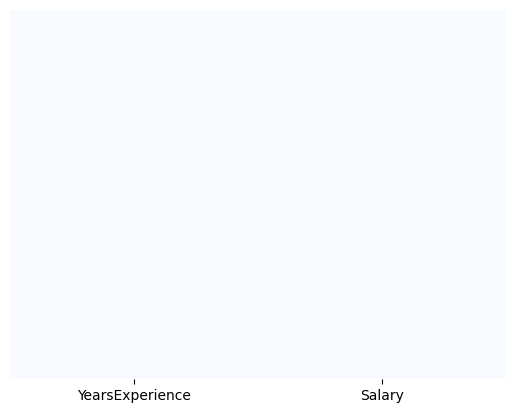

In [7]:
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

1. Above line generates a heatmap that visually represents the presence of missing data in your salary_df DataFrame
2. Cells colored in darker shades of blue indicate missing data (NaN values).
3. Cells in lighter shades or white represent non-missing data (valid entries).
4. Since there are no darker shades of blue present it means we do not have any missing data.

In [8]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [9]:
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [12]:
# The number of years of experience for max salaried employees
max = salary_df[salary_df['Salary'] == salary_df['Salary'].max()]
max

,YearsExperience,Salary
34,13.5,139465


In [13]:
# The number of years of experience for min salaried employees
min = salary_df[salary_df['Salary'] == salary_df['Salary'].min()]
min

,YearsExperience,Salary
2,1.5,37731


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

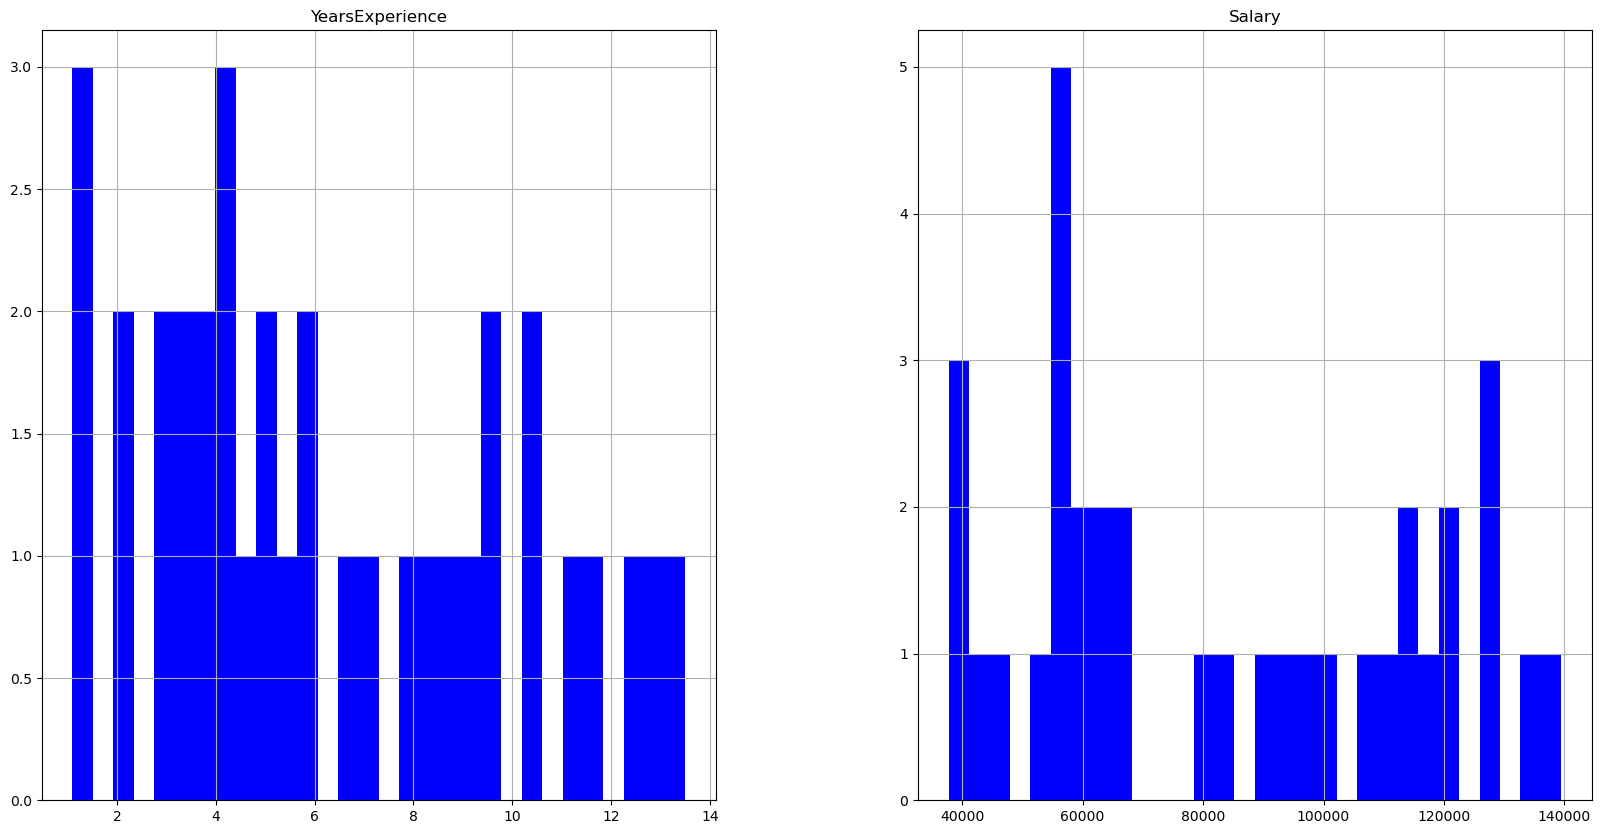

In [16]:
salary_df.hist(bins = 30, figsize = (20, 10), color='b')

1. Above line creates a histogram for each numerical column in the salary_df DataFrame.
2. Histograms are used for visualizing the distribution of data within a single variable. You can see if the data is normally distributed, skewed, or has any outliers.

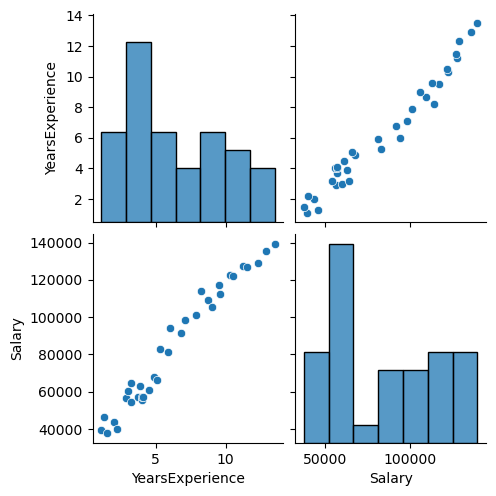

In [17]:
sns.pairplot(salary_df)

1. A pair plot is a grid of scatterplots that shows the relationships between all pairs of variables in a DataFrame.
2. This function generates a pair plot, which is a matrix of scatterplots. Each cell in the matrix represents a scatterplot of one variable against another.

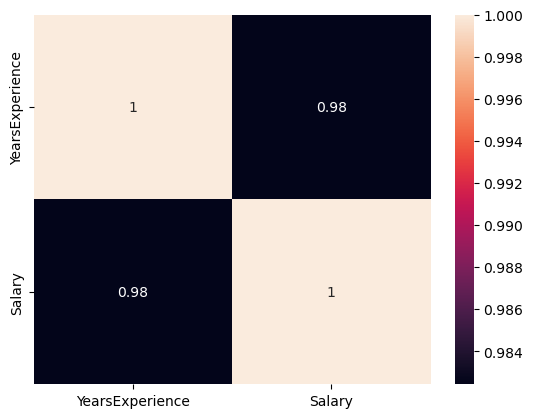

In [18]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

#### This shows a positive correlation between salary and years of experience (98%)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

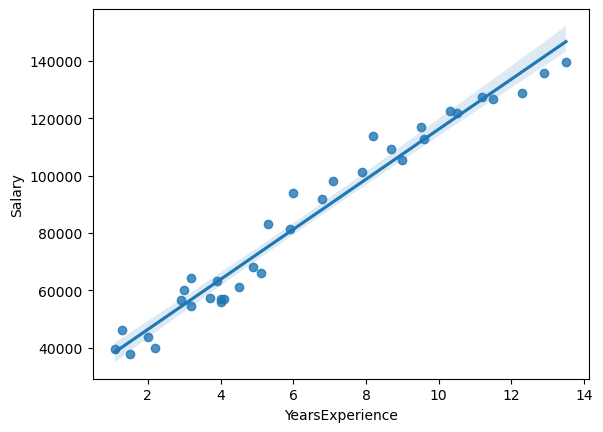

In [19]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = salary_df)

1. sns.regplot is a function from the seaborn library that creates a scatter plot with a linear regression line fitted to the data. 
2. It is useful for visualizing the relationship between two variables and for checking the fit of a linear regression model.

# Create Training and Testing Dataset

In [40]:
X = salary_df[['YearsExperience']]
Y = salary_df[['Salary']]

X.shape
Y.shape

# perform data conversion which will be lated needed for linear learner algorithm
X = np.array(X).astype('float32') 
Y = np.array(Y).astype('float32')

In [41]:
# Split data into test and train sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) # splits and shuffles the data

# Train Linear Regression Model in SciKit-Learn library

In [49]:
# using linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression(fit_intercept = True) # fit_intercept forces the line to go through origin
regression_model_sklearn.fit(X_train, Y_train)

LinearRegression()

In [50]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, Y_test)
regression_model_sklearn_accuracy

0.9790006279945374

##### 97.9% accuracy

In [51]:
print('Linear model coefficient - (m)', regression_model_sklearn.coef_)
print('Linear model coefficient - (b)', regression_model_sklearn.intercept_)

Linear model coefficient - (m) [[8910.697]]
Linear model coefficient - (b) [28402.969]


1. Above values of m and b can be added to linear equation y = xm + b.
2. This value can be given to HR of a company and she can evaluate the salary based on experience.

# Evaluate Trained model performance

In [52]:
Y_predict = regression_model_sklearn.predict(X_test)

In [53]:
Y_predict

array([[ 41769.016],
       [148697.38 ],
       [ 54243.992],
       [105926.03 ],
       [ 61372.55 ],
       [ 46224.363],
       [138004.55 ]], dtype=float32)

Text(0.5, 1.0, 'Salary vs Years of experience')

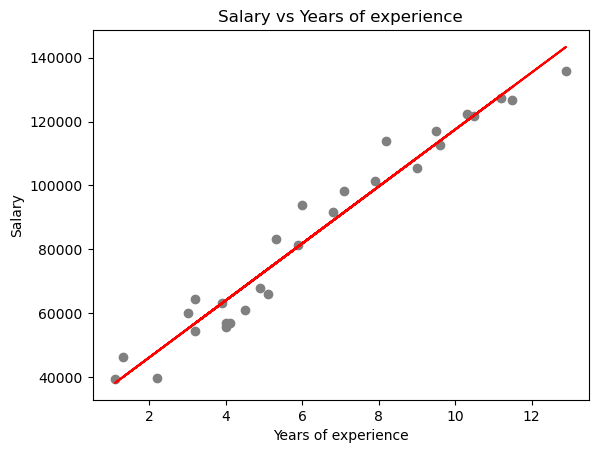

In [54]:
plt.scatter(X_train, Y_train, color='gray')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color='red')
plt.ylabel('Salary')
plt.xlabel('Years of experience')
plt.title('Salary vs Years of experience')

In [58]:
yoe = [[5]] # if years of experience is 5
salary = regression_model_sklearn.predict(yoe)
salary

array([[72956.45507812]])

# Train Linear Learner Model using AWS SageMaker

In [70]:
import sagemaker
import boto3 # allows python to write software code which makes use of AWS services like S3, EC2 etc

# create sagemaker session
sagemaker_session = sagemaker.Session()

bucket = 'sagemaker-implementation' # bucket was created beforehand
prefix = 'linear_learner' # subfolder within the bucket

role = sagemaker.get_execution_role() # this is important to know if we have required permission to access AWS services

Y_train.shape



(28,)

In [71]:
import io # deals with different types of i/o
import sagemaker.amazon.common as smac # sagemake common library

buf = io.BytesIO() # creates in memory byte array and buf is the buffer to write to
smac.write_numpy_to_dense_tensor(buf, X_train, Y_train) # converting data to format understood by sagemaker
buf.seek(0) # in memory byte array is incremented by 1 everytime you write to it. This line will reset it


0

In [89]:
import os

key = 'linear-train-data' # refers to name of file in S3

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf) # uploads data to S3



ValueError: I/O operation on closed file.

In [92]:
# input and output placeholder in S3 to store linear learner data
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key) # input training data location
output_location = 's3://{}/{}/output'.format(bucket, prefix)


s3://sagemaker-implementation/linear_learner/train/linear-train-data


In [93]:
# This code is used to get the training container of sagemaker built-in algorithms
# we just have to specify the name of the algorithm we want to use
# All regression models in sagemaker are called as estimators

from sagemaker.amazon.amazon_estimator import image_uris

container = image_uris.retrieve('linear-learner', boto3.Session().region_name)
print(output_location)
linear = sagemaker.estimator.Estimator(container,
                                      role,
                                      instance_count = 1,
                                      instance_type = 'ml.m5.large',
                                      output_path = output_location,
                                      sagemaker_session = sagemaker_session,
                                      train_use_spot_intances = True,
                                      train_max_run = 300,
                                      train_max_wait = 600)

linear.set_hyperparameters(feature_dim = 1,
                          predictor_type = 'regressor',
                          mini_batch_size = 5,
                          epochs = 5,
                          num_models = 32,
                          loss = 'absolute_loss')

linear.fit({'train': s3_train_data})

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-09-06-13-01-58-105


s3://sagemaker-implementation/linear_learner/output
2024-09-06 13:01:59 Starting - Starting the training job...
2024-09-06 13:02:12 Starting - Preparing the instances for training...
2024-09-06 13:02:38 Downloading - Downloading input data...
2024-09-06 13:03:18 Downloading - Downloading the training image.........
2024-09-06 13:04:54 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/06/2024 13:04:59 INFO 139967254308672] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.

# Deploy and test trained linear model

In [102]:
linear_regressor = linear.deploy(initial_instance_count = 1,
                                instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-09-06-13-58-09-996
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-09-06-13-58-09-996
INFO:sagemaker:Creating endpoint with name linear-learner-2024-09-06-13-58-09-996


-------!

In [103]:
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer


linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [104]:
result = linear_regressor.predict(X_test)
result # result in json format

{'predictions': [{'score': 40394.515625},
  {'score': 165282.96875},
  {'score': 54964.8359375},
  {'score': 115327.59375},
  {'score': 63290.734375},
  {'score': 45598.203125},
  {'score': 152794.140625}]}

In [105]:
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([ 40394.515625 , 165282.96875  ,  54964.8359375, 115327.59375  ,
        63290.734375 ,  45598.203125 , 152794.140625 ])

In [106]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs Years of experience')

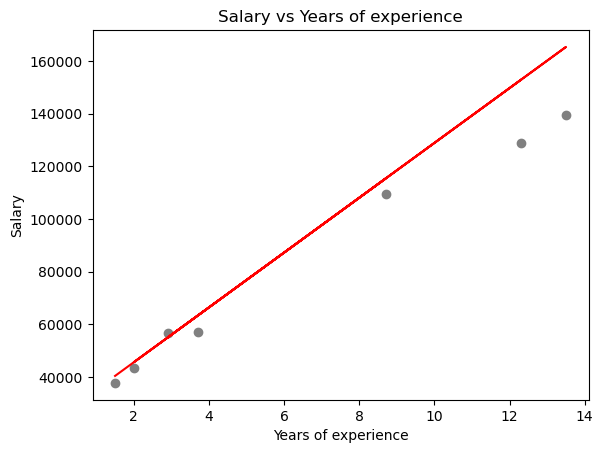

In [107]:
# Visualize test result

plt.scatter(X_test, Y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of experience')

In [108]:
linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-09-06-13-58-09-996
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-09-06-13-58-09-996
